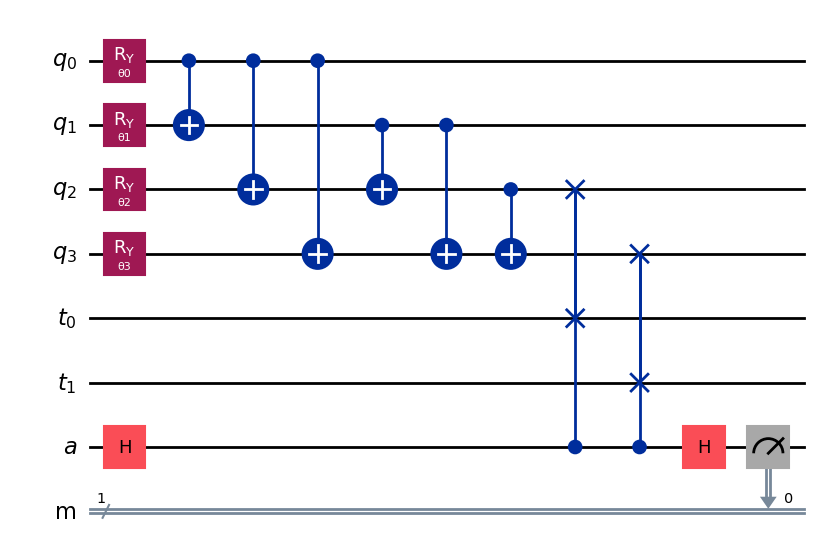

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter

def make_circuit(nq, nt):
    # Registers (match the labels in your diagram)
    q = QuantumRegister(nq, "q")     
    t = QuantumRegister(nt, "t")    
    a = QuantumRegister(1, "a") 
    m = ClassicalRegister(1, "m")  

    qc = QuantumCircuit(q, t, a, m)

    # Parameters θ0..θnq
    theta = [Parameter(f"θ{i}") for i in range(nq)]

    # Ry layer on q0..q3
    for i in range(nq):
        qc.ry(theta[i], q[i])

    # CNOT pattern
    for i in range(nq):
        for j in range(i+1, nq):
            qc.cx(q[i], q[j])

    # Ancilla H
    qc.h(a[0])

    # Controlled-SWAPs
    for i in reversed(range(nt)):
        qc.cswap(a[0], q[-(i+1)], t[-(i+1)])

    # Final H + measure ancilla
    qc.h(a[0])
    qc.measure(a[0], m[0])

    return qc, theta

nq = 4
nt = 2
qc, theta = make_circuit(nq, nt)
qc.draw('mpl', fold=True)


In [25]:
bound = qc.assign_parameters({theta[0]: 0.1, theta[1]: 0.2, theta[2]: 0.3, theta[3]: 0.4})

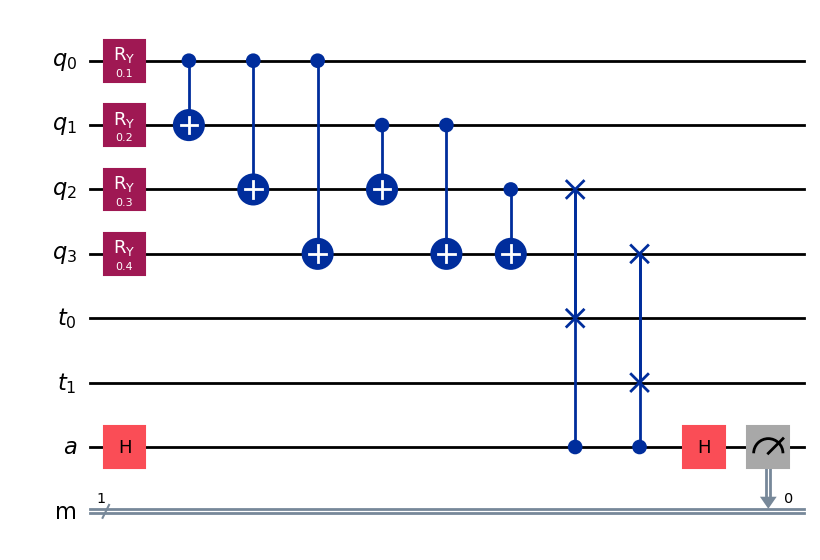

In [26]:
bound.draw('mpl', fold=True)